## 0. Load the data

In [1]:
# Import all the packages that we are going to use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the datasets into separate variables
d2015 = pd.read_csv("2015.csv")
d2016 = pd.read_csv("2016.csv")
d2017 = pd.read_csv("2017.csv")
d2018 = pd.read_csv("2018.csv")
d2019 = pd.read_csv("2019.csv")

## 1. Clean the dataset

### 1.1. Add the column with a year

The datasets do not have year indication. To make it easier for the further data analysis, we add a column with corresponding year to each dataframe.

In [4]:
d2015 = d2015.assign(Year=2015)
d2016 = d2016.assign(Year=2016)
d2017 = d2017.assign(Year=2017)
d2018 = d2018.assign(Year=2018)
d2019 = d2019.assign(Year=2019)

### 1.2. Explore the data

In [8]:
d2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
 12  Year                           158 non-null    int

In [9]:
d2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [10]:
d2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
 12  Year                           155 non-null    int

In [11]:
d2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
 9   Year                          156 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 12.3+ KB


In [12]:
d2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
 9   Year                          156 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 12.3+ KB


After exploring the data, we realized that the column names are different in dataasets. Thus, we need to rename the columns for further merge of the datasets. 
Also, the number of entries are not the same in all datasets, so the countries analysed each year are not the same. 

### 1.3. Rename certain columns

In [13]:
d2017 = d2017.rename(columns = {'Happiness.Rank': 'Happiness Rank', 'Happiness.Score': 'Happiness Score',
                                'Whisker.high': 'Whisker high', 'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
                                'Health..Life.Expectancy.': 'Health (Life Expectancy)',
                                'Trust..Government.Corruption.': 'Trust (Government Corruption)', 'Dystopia.Residual': 'Dystopia Residual'})

In [14]:
d2018 = d2018.rename(columns = {'GDP per capita': 'Economy (GDP per Capita)', 'Healthy life expectancy': 'Health (Life Expectancy)',
                                'Freedom to make life choices': 'Freedom', 'Perceptions of corruption': 'Trust (Government Corruption)',
                                'Overall rank': 'Happiness Rank', 'Score': 'Happiness Score',
                                'Country or region': 'Country', 'Social support': 'Family'})

In [15]:
d2019 = d2019.rename(columns = {'GDP per capita': 'Economy (GDP per Capita)','Healthy life expectancy': 'Health (Life Expectancy)',
                                'Freedom to make life choices': 'Freedom', 'Perceptions of corruption': 'Trust (Government Corruption)',
                                'Overall rank': 'Happiness Rank', 'Score': 'Happiness Score', 'Country or region': 'Country',
                                'Social support': 'Family'})

#### 1.4.1 Check if Country names differ across datasets

In [16]:
#Check all countries that are not included in all datasets
dyear=[d2015,d2016,d2017,d2018,d2019]

Countrydiff="" # Set a string, which will contain countries with different names
for x in dyear: # Loop over each file
    for y in dyear: 
        Countrydiff+='\n'+x[~x.Country.isin(y.Country)].Country.to_string(index=False) # Append the string with countries that have different names.
Countrydiff=Countrydiff.replace('Series([], )','').strip().split("\n")


In [17]:
Countrydiff # Check how the country names look like

['Oman',
 '        Somaliland region',
 '               Mozambique',
 '                  Lesotho',
 '                Swaziland',
 '                 Djibouti',
 ' Central African Republic',
 '              Oman',
 '            Taiwan',
 '          Suriname',
 '         Hong Kong',
 ' Somaliland region',
 '              Laos',
 '         Swaziland',
 '          Djibouti',
 '           Comoros',
 '                Oman',
 '            Suriname',
 ' Trinidad and Tobago',
 '        North Cyprus',
 '   Somaliland region',
 '           Swaziland',
 '            Djibouti',
 '             Comoros',
 '                Oman',
 '            Suriname',
 ' Trinidad and Tobago',
 '        North Cyprus',
 '   Somaliland region',
 '           Macedonia',
 '               Sudan',
 '            Djibouti',
 '              Angola',
 '       Puerto Rico',
 '            Belize',
 '           Somalia',
 ' Somaliland Region',
 '           Namibia',
 '       South Sudan',
 '',
 '       Puerto Rico',
 '           

In [18]:
Countryvar=[] # Prepare a list that will contain 'cleaned' country names
for i in Countrydiff: # Loop over the list with countries with different names
    j = i.strip() # Clean the country name from unnecessary spaces
    Countryvar.append(j) # Append the list

In [23]:
set(Countryvar) 
#here we can see the countries that are named differently accros the datasets when we concate we 
#need to rename 
#'Hong Kong S.A.R., China'to 'Hong Kong'; 
#'Northern Cyprus' to 'North Cyprus';
#'Somaliland region' to Somaliland Region';
#'Taiwan Province of China' to 'Taiwan'; '
#Trinidad & Tobago' to 'Trinidad and Tobago'

{'',
 'Angola',
 'Belize',
 'Central African Republic',
 'Comoros',
 'Djibouti',
 'Gambia',
 'Hong Kong',
 'Hong Kong S.A.R., China',
 'Laos',
 'Lesotho',
 'Macedonia',
 'Mozambique',
 'Namibia',
 'North Cyprus',
 'North Macedonia',
 'Northern Cyprus',
 'Oman',
 'Puerto Rico',
 'Somalia',
 'Somaliland Region',
 'Somaliland region',
 'South Sudan',
 'Sudan',
 'Suriname',
 'Swaziland',
 'Taiwan',
 'Taiwan Province of China',
 'Trinidad & Tobago',
 'Trinidad and Tobago'}

#### 1.4.2. Rename country names that differ

In [24]:
for x in dyear: # Loop over the list of dataframes
    x['Country']=x['Country'].replace({'Hong Kong S.A.R., China': 'Hong Kong',
                          'Northern Cyprus': 'North Cyprus',
                          'Somaliland region': 'Somaliland Region',
                          'Taiwan Province of China': 'Taiwan',
                          'Trinidad & Tobago':'Trinidad and Tobago'})

### 1.5. Add region to d2017, d2018 and d2019 datasets

To answer one of our questions, we need to have regions in all files., not just in 2015 and 2016. For that, we need to update dataframes that contain data from 2017, 2018, and 2019. 

#### 1.5.1 Create a dataset with the countries and regions provided in d2015 and d2016

In [27]:
dfcr15=d2015[['Country','Region']]
dfcr16=d2016[['Country','Region']]
dfcr=pd.concat([dfcr15, dfcr16],ignore_index=True)
dfcr=dfcr.drop_duplicates()
print(dfcr.head())

       Country          Region
0  Switzerland  Western Europe
1      Iceland  Western Europe
2      Denmark  Western Europe
3       Norway  Western Europe
4       Canada   North America


In [29]:
dfcr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 300
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  163 non-null    object
 1   Region   163 non-null    object
dtypes: object(2)
memory usage: 3.8+ KB


#### 1.5.2 Add the region on two countries without Region

In [31]:
# We add Gambia row as its region is not defined in dfcr.columns
dfcr.loc[301] = ['Gambia','Sub-Saharan Africa']
dfcr.loc[302] = ['North Macedonia','Central and Eastern Europe']

#### 1.5.3. Add the region column to d2017,d2018,d2019

In [33]:
d2017n = pd.merge(d2017, dfcr, how='left')
d2018n = pd.merge(d2018, dfcr, how='left')
d2019n = pd.merge(d2019, dfcr, how='left')

In [36]:
d2019n[d2019n['Region'].isnull()] #we check if there is any country without region
#d2016[d2016['Country'].str.contains("North Macedonia")]

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year,Region


### 1.6. Merge the datasets

In [37]:
datall = pd.concat([d2015,d2016,d2017n,d2018n,d2019n], ignore_index=True)

In [38]:
datall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        782 non-null    object 
 1   Region                         782 non-null    object 
 2   Happiness Rank                 782 non-null    int64  
 3   Happiness Score                782 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       782 non-null    float64
 6   Family                         782 non-null    float64
 7   Health (Life Expectancy)       782 non-null    float64
 8   Freedom                        782 non-null    float64
 9   Trust (Government Corruption)  781 non-null    float64
 10  Generosity                     782 non-null    float64
 11  Dystopia Residual              470 non-null    float64
 12  Year                           782 non-null    int

In [39]:
datall.head()
#Some variables are with NaN because they are not avaiable in all years

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval,Whisker high,Whisker.low
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN


### 1.7.  Remove variables that are not in all datasets

In [41]:
dataf = datall.drop(['Standard Error','Dystopia Residual',
                     'Lower Confidence Interval', 'Upper Confidence Interval','Whisker high','Whisker.low'], axis=1)

In [42]:
dataf.shape

(782, 11)

In [43]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        782 non-null    object 
 1   Region                         782 non-null    object 
 2   Happiness Rank                 782 non-null    int64  
 3   Happiness Score                782 non-null    float64
 4   Economy (GDP per Capita)       782 non-null    float64
 5   Family                         782 non-null    float64
 6   Health (Life Expectancy)       782 non-null    float64
 7   Freedom                        782 non-null    float64
 8   Trust (Government Corruption)  781 non-null    float64
 9   Generosity                     782 non-null    float64
 10  Year                           782 non-null    int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 67.3+ KB


The dataset is ready to be analyzed. The next section contains analyses for our team's questions. 

## Questions

### 1. Are the Happiness Score and related indices associated? Does the association vary across years?

In [44]:
dfcorr=dataf[['Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year']]

Let's explore the association at year 2015

In [45]:
dfcorr2015 = dfcorr[(dfcorr['Year'] == 2015)]
dfcorr2015 = dfcorr2015.drop('Year', 1)
#pd.plotting.scatter_matrix(dfcorr2015,figsize=(16, 16))

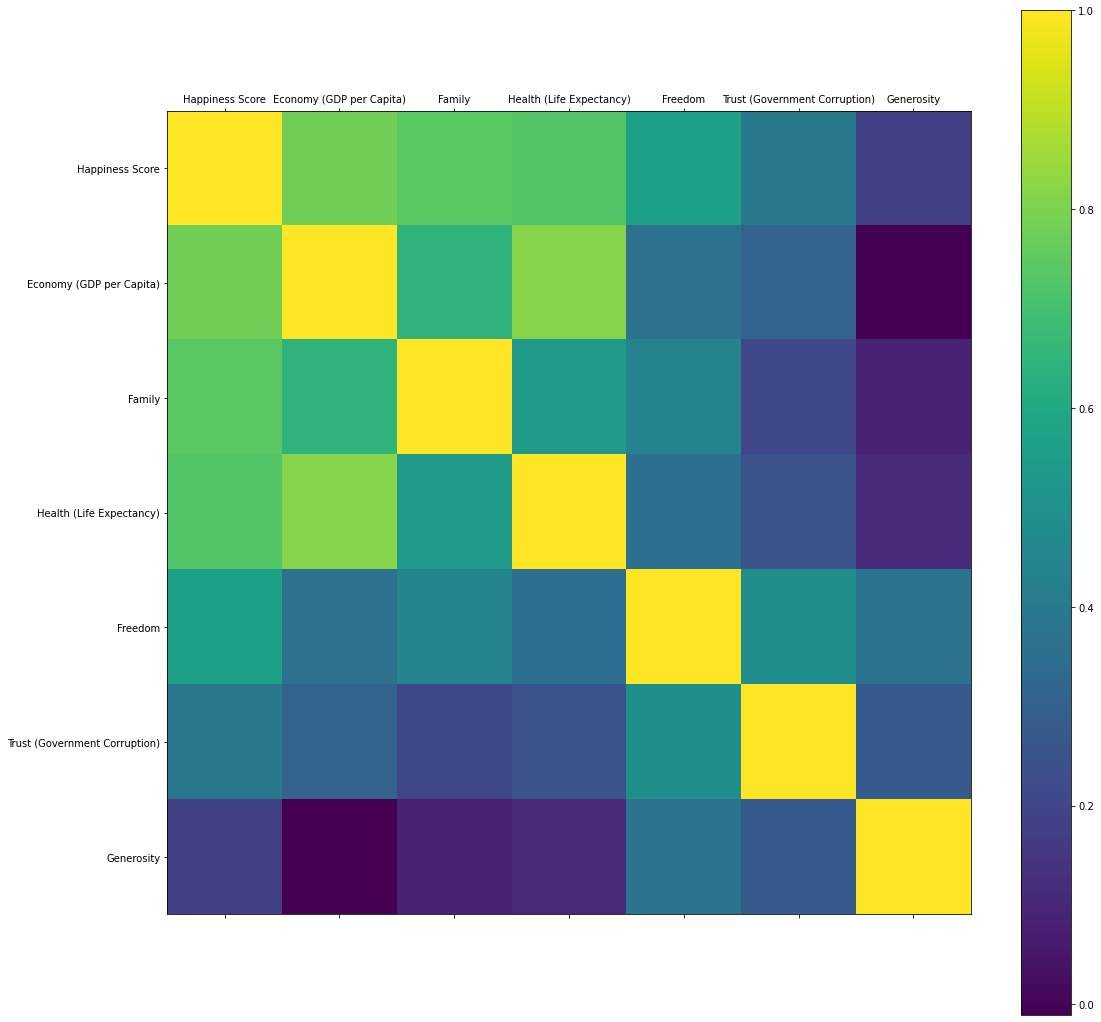

In [46]:
matfig = plt.figure(figsize=(18,18))
plt.matshow(dfcorr2015.corr(),fignum=matfig.number)
plt.xticks(range(len(dfcorr2015.columns)), dfcorr2015.columns)
plt.yticks(range(len(dfcorr2015.columns)), dfcorr2015.columns)
plt.colorbar()
plt.show()

As we can see in the correlation plot, the happiness score is highly correlated with the GDP, family and life expectancy and less correlated with generosity in year 2015. So it might suggests that stingy people are happier 😃

### Does the association vary across years?

In [48]:
vyear = [2015,2016,2017,2018,2019]
df_corr = pd.DataFrame(columns=['year', 'var1', 'var2','correlation']) #create a database that save pair of correlated variables
for y in vyear:
    dfcorry=dfcorr[(dfcorr['Year'] == y)] #create a database for each year
    dfcorry=dfcorry.drop('Year', 1)
    corr = dfcorry.corr() #Calculate the correlation matrix of year y
    for i in range(7): #Create a database with the correlation pairs of variables
        for j in range(i+1,7):
            new_row = pd.Series({'year': y, 'var1': corr.columns[i], 'var2': corr.columns[j],'correlation':corr.iloc[i,j]})
            df_corr = df_corr.append(new_row, ignore_index=True)


In [49]:
df_corr.head()

,year,var1,var2,correlation
0,2015,Happiness Score,Economy (GDP per Capita),0.780966
1,2015,Happiness Score,Family,0.740605
2,2015,Happiness Score,Health (Life Expectancy),0.724200
3,2015,Happiness Score,Freedom,0.568211
4,2015,Happiness Score,Trust (Government Corruption),0.395199


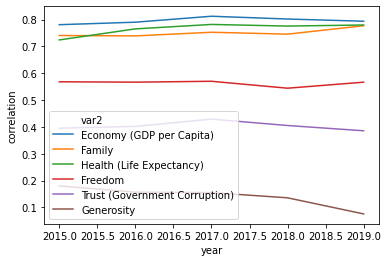

In [50]:
dfhappy = df_corr[(df_corr['var1'] == "Happiness Score")]
linevar = sns.lineplot(x='year', y='correlation', hue='var2', data=dfhappy)

We can see that the correlation of the happiness score with GDP and health expectancy increases slightly until 2017, and then the association remains stable.
When we look at the correlation of happiness with generosity, the association decreases over time.

### 2. What are the happiest and least happy regions in the world? What is the region with the biggest difference between minimum and maximum happiness score?

In this part of the analysis, we want to find happiest and least happy regions. In addition, we want to see what region has the biggest difference between Happiness Scores. Potentially, we might want to find an explanation for such a difference. 

In [51]:
grouped_region = dataf.groupby(['Region']) # Slice the main dataframe into a new variable to have a grouped by regions dataframe
grouped_region = grouped_region.agg({'Happiness Score' : [np.min, np.max, np.ptp, np.mean]}) # Prepare a table with aggregated min, max, difference, and mean of Happiness Scores per region

# To make it more visualized, prepare two functions that will highlight biggest and smallest values in each column
def highlight_max(s): 
    #highlight the maximum in a Series yellow.
    is_max = s == s.max()
    return ['background-color: gold' if v else '' for v in is_max]

def highlight_min(s):
    #highlight the minimum in a Series red.
    is_min = s == s.min()
    return ['background-color: red' if v else '' for v in is_min]

# Apply the style to the dataframe with aggregated Happiness Scores
grouped_region.style.\
    apply(highlight_max).\
    apply(highlight_min)

We see that *Australia and New Zealand* is the happiest region in the world, and *Southern Asia* - the least happy region. The region *Middle East and Northern Africa* has the biggest difference in the Happiness Score. Let's look into the data of countries in this region to see where the difference is coming from. 

In [52]:
me_na_region = dataf.loc[dataf['Region'] == 'Middle East and Northern Africa'] # Select only countries that belong to Middle East and Northern Africa region. 
grouped_me_na = me_na_region.groupby(['Country']).agg({'Happiness Score' : [np.min, np.max, np.ptp, np.mean]}) #Group data by country and show minimum and maximum happibess score for each country, their difference, and the mean of happines scores
grouped_me_na.style.\
    apply(highlight_max).\
    apply(highlight_min)

We can see that Syria has both lowest Minimum and Maximum Happiness Score acrossd the years, as well as the mean. We can build a graph to visualize the difference between countries.

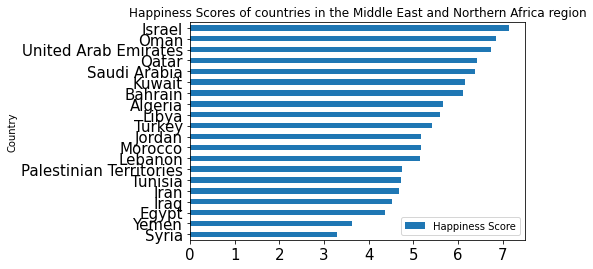

In [54]:
mean_me_na = me_na_region.groupby(['Country']).mean() 
# Prepare a dataframe with means of all variables grouped by country
mean_me_na['Happiness Score'].sort_values(ascending=True).plot(kind='barh', 
                        title = 'Happiness Scores of countries in the Middle East and Northern Africa region', 
                        legend = True, fontsize = 15) 
# Build a horizontal bar plot

Based on the visual observation, we can see that Yemen and Syria have the biggest 'step' away from their neighboring countries. Both countries have been in civil war for the past 5 years, which, although highly speculative, can partially explain low Happiness Score there. We can compare how well other variables explain Happiness Score in the countries to see if it might be the case.

In [55]:
grouped_me_na2 = me_na_region.groupby(['Country']) #Group data by country
grouped_me_na2 = grouped_me_na2.agg({'Economy (GDP per Capita)' : [np.min, np.max], 'Freedom' : [np.min, np.max], \
                                     'Health (Life Expectancy)' : [np.min, np.max], 'Family' : [np.min, np.max],
                                     'Trust (Government Corruption)' : [np.min, np.max], 'Generosity' : [np.min, np.max]})
grouped_me_na2.style.\
    apply(highlight_min)

In the table above it is visible that indices had almost the lowest explanation of the Happiness Score for Yemen and Syria; thus, it is possible that something else was playing a role in a big difference in Happiness Scores of those countries compared to other countries from the same region.

## 3. Do happier countries also have higher GDP?

It might also be the case that happier countries in general have higher GDP. However, the current data doesn't provide such an insight; to have an answer to the question, we will need to merge another dataset.
For this purpose, we will use the file that contains information on the demographic data, including GDP per capita (https://www.kaggle.com/fernandol/countries-of-the-world). 

In [58]:
demographic_data = pd.read_csv('Demographic_data.csv') #Open the file with the data first
dataf_copy = dataf.copy() 
#Make the copy of the clean data file to ensure that nobody is running into any issues with that

In [59]:
demographic_data.info() #Investigate the data to see available columns and how data is represented
demographic_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [60]:
dataf_copy2017 = dataf_copy.loc[dataf_copy['Year'] == 2017] #Selecting only data from 2017

In [61]:
demographic_data.keys()

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [62]:
demographic_data.values #Investigating the way values are entered

array([['Afghanistan ', 'ASIA (EX. NEAR EAST)         ', 31056997, ...,
        '0,38', '0,24', '0,38'],
       ['Albania ', 'EASTERN EUROPE                     ', 3581655, ...,
        '0,232', '0,188', '0,579'],
       ['Algeria ', 'NORTHERN AFRICA                    ', 32930091, ...,
        '0,101', '0,6', '0,298'],
       ...,
       ['Yemen ', 'NEAR EAST                          ', 21456188, ...,
        '0,135', '0,472', '0,393'],
       ['Zambia ', 'SUB-SAHARAN AFRICA                 ', 11502010, ...,
        '0,22', '0,29', '0,489'],
       ['Zimbabwe ', 'SUB-SAHARAN AFRICA                 ', 12236805,
        ..., '0,179', '0,243', '0,579']], dtype=object)

Every country name has an additional space after it, which makes it impossible to merge two dataframes on the country. First need to remove the spaces. 

In [63]:
demographic_data['Country'] = demographic_data['Country'].str.strip() #Removing the spaces
demographic_data.values

array([['Afghanistan', 'ASIA (EX. NEAR EAST)         ', 31056997, ...,
        '0,38', '0,24', '0,38'],
       ['Albania', 'EASTERN EUROPE                     ', 3581655, ...,
        '0,232', '0,188', '0,579'],
       ['Algeria', 'NORTHERN AFRICA                    ', 32930091, ...,
        '0,101', '0,6', '0,298'],
       ...,
       ['Yemen', 'NEAR EAST                          ', 21456188, ...,
        '0,135', '0,472', '0,393'],
       ['Zambia', 'SUB-SAHARAN AFRICA                 ', 11502010, ...,
        '0,22', '0,29', '0,489'],
       ['Zimbabwe', 'SUB-SAHARAN AFRICA                 ', 12236805, ...,
        '0,179', '0,243', '0,579']], dtype=object)

In [65]:
full_data_2017 = dataf_copy2017.merge(demographic_data, left_on = 'Country', right_on = 'Country') 
#Merging two files on the same column - country name
full_data_2017.head(1)

,Country,Region_x,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Norway,Western Europe,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,...,"461,7","2,87",0,"97,13",3,"11,46","9,4","0,021","0,415","0,564"


Now we have complete data. We will build a plot to visualize relationships between Happiness Score and GDP.

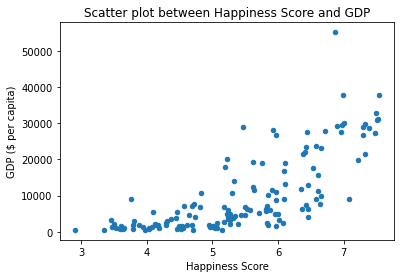

In [68]:
full_data_2017.plot.scatter(x='Happiness Score', 
                            y='GDP ($ per capita)', 
                            title= "Scatter plot between Happiness Score and GDP");

There seems to be a linear relationship between GDP per capita in countries with lower GDP/Happines Scores. The higher it gets, the more diverse result appears.

In [69]:
from scipy.stats.stats import pearsonr
pearsonr(full_data_2017['Happiness Score'], full_data_2017['GDP ($ per capita)']) 
# Using Spearman correlation here because not sure whether the data distribution is normal or not

(0.7423500664783038, 4.042184642128556e-26)

The correlations above shows that GDP per capita has a high positive Spearman rank correlation, .805 in the pandas calculation and .742 using statistical package. Besides, the p value is extremely low, implying that we cannot confirm the null hypothesis about absence of the relation between variables, meaning that Happiness Score and GDP per capita are positevely related.

We might want to explore some other demographics factors that were not considered in the original dataset. For example, we can build a scatterplot of the Population density per square meter with Happiness Score.

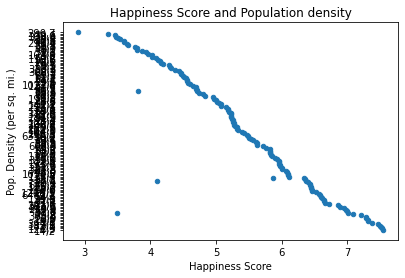

In [71]:
full_data_2017.plot.scatter(x='Happiness Score', 
                            y='Pop. Density (per sq. mi.)', 
                            title= "Happiness Score and Population density");

The graphic above shows almost linear relation of the Happiness Score to the Population density: the denser population, the smaller is Happiness Score. 

### 4. Which countries have more variation in happiness score between 2015 and 2019?


In [72]:
# Make a copy of the dataset
datav = dataf.copy()

In [79]:
var_score = datav[['Country', 'Happiness Score', 'Year']] # Take just the columns needed

In [80]:
var_country = pd.pivot_table(var_score, index='Country', values='Happiness Score', aggfunc=['max', 'min']) 
# Make a pivot table with max and min values for hapiness scores in each country

In [81]:
var_country.head()

,max,min
,Happiness Score,Happiness Score
Country,,
Afghanistan,3.794,3.203
Albania,4.959,4.586
Algeria,6.355,5.211
Angola,4.033,3.795
Argentina,6.650,6.086


In [82]:
var_country['diff'] = (var_country[max]-var_country[min])*1 
# Create new column with difference between min and max

In [85]:
sorted_diff = var_country.sort_values(by=['diff'],ascending=True) 
# Sort the countries with more difference

In [84]:
top5diff = sorted_diff[:5] # Select the top 5
print(top5diff)

                        max             min   diff
            Happiness Score Happiness Score       
Country                                           
Venezuela             6.810           4.707 -2.103
Benin                 4.883           3.340 -1.543
Ivory Coast           4.944           3.655 -1.289
Togo                  4.085           2.839 -1.246
Algeria               6.355           5.211 -1.144


In [86]:
top5diff.columns = top5diff.columns.droplevel(0)
top5diff.columns.name = None
top5diff = top5diff.reset_index() 
#Transform the pivot table in df

In [87]:
top5diff

,Country,Happiness Score,Happiness Score,
0,Venezuela,6.810,4.707,-2.103
1,Benin,4.883,3.340,-1.543
2,Ivory Coast,4.944,3.655,-1.289
3,Togo,4.085,2.839,-1.246
4,Algeria,6.355,5.211,-1.144


In [88]:
top5diff.columns = ['country','max','min','diff'] # Rename df columns

In [89]:
top5diff

,country,max,min,diff
0,Venezuela,6.810,4.707,-2.103
1,Benin,4.883,3.340,-1.543
2,Ivory Coast,4.944,3.655,-1.289
3,Togo,4.085,2.839,-1.246
4,Algeria,6.355,5.211,-1.144


These are the top 5 countries with more variation between the min and max happiness score in the five year period.

##### What was the variation that happened in these countries?  It increased or decreased?

In [92]:
dfvar = var_score.loc[var_score['Country'].isin(top5diff['country'])] 
# Select only the countries in the top5 diff from the df will all years

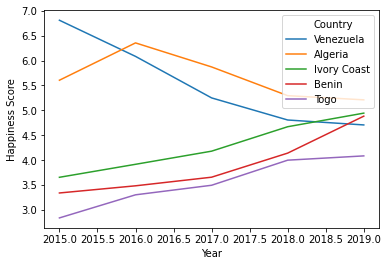

In [93]:
linevar = sns.lineplot(x='Year', y='Happiness Score', hue='Country', data=dfvar) 
# Make the line chart

Is it possible to see the countries had different trends. Venezuela had a decrease during all five year. Algeria had a peak in 2016. Ivory Coast, Benin and Togo increased in the five-year period.

### 5. How Germany's and Brazil's results developed through years?

In [94]:
ger_and_br = datav.loc[datav['Country'].isin(['Brazil', 'Germany'])] # create a dataset with just germany and brazil

In [95]:
ger_and_br.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 15 to 657
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        10 non-null     object 
 1   Region                         10 non-null     object 
 2   Happiness Rank                 10 non-null     int64  
 3   Happiness Score                10 non-null     float64
 4   Economy (GDP per Capita)       10 non-null     float64
 5   Family                         10 non-null     float64
 6   Health (Life Expectancy)       10 non-null     float64
 7   Freedom                        10 non-null     float64
 8   Trust (Government Corruption)  10 non-null     float64
 9   Generosity                     10 non-null     float64
 10  Year                           10 non-null     int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 960.0+ bytes


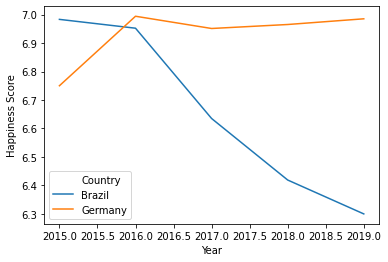

In [96]:
line = sns.lineplot(x='Year', y='Happiness Score', hue='Country', data=ger_and_br) # make the line chart

While Germany had Happiness Score increased between 2015 and 2016, and later maintaining steady high numbers in 2016-2019, Brazil's Happiness Score was decreasing in the same period.

##### And what about the other variables?

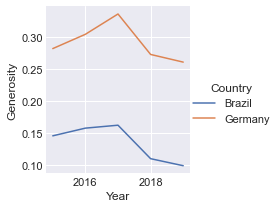

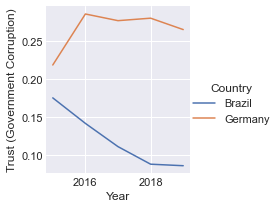

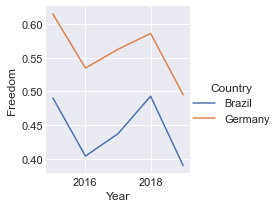

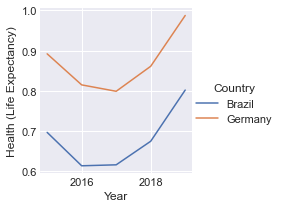

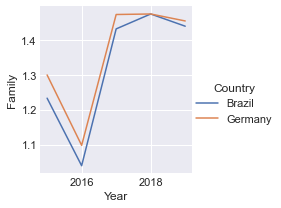

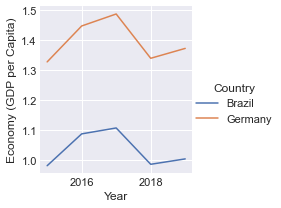

In [187]:
g = sns.FacetGrid(ger_and_br, hue='Country')
g = g.map(sns.lineplot, 'Year', 'Generosity', ci=None).add_legend()

t = sns.FacetGrid(ger_and_br, hue='Country')
t = t.map(sns.lineplot, 'Year', 'Trust (Government Corruption)', ci=None).add_legend()

f = sns.FacetGrid(ger_and_br, hue='Country')
f = f.map(sns.lineplot, 'Year', 'Freedom', ci=None).add_legend()

h = sns.FacetGrid(ger_and_br, hue='Country')
h = h.map(sns.lineplot, 'Year', 'Health (Life Expectancy)', ci=None).add_legend()

fa = sns.FacetGrid(ger_and_br, hue='Country')
fa = fa.map(sns.lineplot, 'Year', 'Family', ci=None).add_legend()

e = sns.FacetGrid(ger_and_br, hue='Country')
e = e.map(sns.lineplot, 'Year', 'Economy (GDP per Capita)', ci=None).add_legend()

Analysing the trend, just the variable 'Trust (Government Corruption)' had a different behaviour in the same period. In Germany the Trust went higher in 2016 and maintened like that. In Brazil, had a decrease during the whole period.

The gaps in score are in almost all variables, besides Family, that both countries are in same level.

### 6 Which features make such a big difference between Austrialia and New Zealand and Sub-Saharan African?

From below graph (we only use averaged values), Australia and New Zealand is top 1, however, Sub-Saharan Africa is bottom 1, which features make them different?

In [100]:
datax = dataf.copy()

In [101]:
# pd.pivot_table(dataf, index='Year', values="Happiness Score")
# pd.pivot_table(dataf, index='Region', values="Happiness Score")
columns = ["Economy (GDP per Capita)","Family","Health (Life Expectancy)","Freedom","Trust (Government Corruption)","Generosity"]
pd.pivot_table(datax, index = ['Region', 'Year'], values=columns)
pd.pivot_table(datax, index = ['Region','Country','Happiness Rank', 'Year'], values=columns)
# table
pd.pivot_table(datax, index = ['Region', 'Year'], values="Happiness Score")
pd.pivot_table(datax, index= 'Region', columns='Year', values="Happiness Score")

Year,2015,2016,2017,2018,2019
Region,,,,,
Australia and New Zealand,7.285000,7.323500,7.299000,7.298000,7.267500
Central and Eastern Europe,5.332931,5.370690,5.409931,5.463966,5.561517
Eastern Asia,5.626167,5.624167,5.646667,5.672000,5.688833
Latin America and Caribbean,6.144682,6.101750,5.957818,5.950136,5.954429
Middle East and Northern Africa,5.406900,5.386053,5.369684,5.282737,5.237000
North America,7.273000,7.254000,7.154500,7.107000,7.085000
Southeastern Asia,5.317444,5.338889,5.444875,5.313444,5.273667
Southern Asia,4.580857,4.563286,4.628429,4.603857,4.526857
Sub-Saharan Africa,4.202800,4.136421,4.111949,4.195026,4.300050


In [105]:
pd.pivot_table(datax, index = 'Region', values="Happiness Score",
               aggfunc= [np.mean, min, max, np.std, lambda x: x.count()/3])

,mean,min,max,std,<lambda>
,Happiness Score,Happiness Score,Happiness Score,Happiness Score,Happiness Score
Region,,,,,
Australia and New Zealand,7.294600,7.228,7.334,0.030787,3.333333
Central and Eastern Europe,5.427807,4.096,6.852,0.585201,48.333333
Eastern Asia,5.651567,4.874,6.446,0.479466,10.000000
Latin America and Caribbean,6.023811,3.582,7.226,0.721001,37.000000
Middle East and Northern Africa,5.337208,3.006,7.278,1.022185,32.000000
North America,7.174700,6.886,7.427,0.204057,3.333333
Southeastern Asia,5.335227,3.819,6.798,0.801819,14.666667
Southern Asia,4.580657,3.203,5.653,0.587753,11.666667


In [106]:
def remove_outliers(values):
    mid_quantiles = values.quantile([.25, .75])
    return np.mean(mid_quantiles)

pd.pivot_table(datax, index = 'Region', values="Happiness Score",
               aggfunc= [np.mean, remove_outliers, lambda x: x.count()/3])

,mean,remove_outliers,<lambda>
,Happiness Score,Happiness Score,Happiness Score
Region,,,
Australia and New Zealand,7.294600,7.298875,3.333333
Central and Eastern Europe,5.427807,5.488500,48.333333
Eastern Asia,5.651567,5.586750,10.000000
Latin America and Caribbean,6.023811,6.106250,37.000000
Middle East and Northern Africa,5.337208,5.459125,32.000000
North America,7.174700,7.172875,3.333333
Southeastern Asia,5.335227,5.398000,14.666667
Southern Asia,4.580657,4.693500,11.666667


In [109]:
table = pd.pivot_table(datax, index = 'Region', values="Happiness Score",
               aggfunc= [np.mean, remove_outliers])

# table[table.index.str.contains('')]
# table

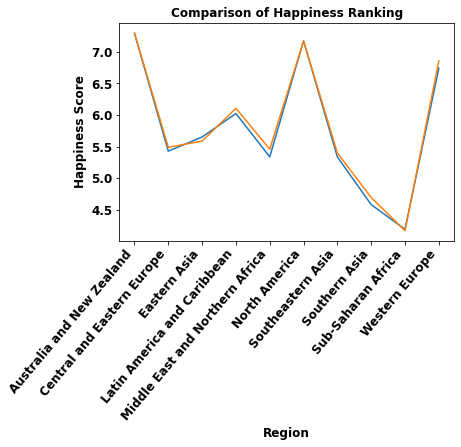

In [112]:
plt.plot(table)
# label the x and y axes
plt.xlabel('Region', weight='bold', size='large')
plt.ylabel('Happiness Score', weight='bold', size='large')

# format the x and y ticks
plt.xticks(rotation=50, horizontalalignment='right', weight='bold', size='large')
plt.yticks(weight='bold', size='large')

# give it a title
plt.title("Comparison of Happiness Ranking", weight='bold')

# displays the graph
plt.show()

In [114]:
df_region_A = datax[datax['Region']=='Australia and New Zealand']
df_region_Sub = datax[datax['Region']=='Sub-Saharan Africa']
df_combined = pd.concat([df_region_A,df_region_Sub],ignore_index=True)

In [115]:
df_combined
# columns = ["Economy (GDP per Capita)","Family","Health (Life Expectancy)","Freedom","Trust (Government Corruption)","Generosity"]
df_combined_sorted = df_combined.sort_values(['Region','Year','Happiness Rank'])
df_combined.head(30)
# pd.pivot_table(dataf, index = ['Region','Country','Happiness Rank','Happiness Score', 'Year'], values=columns)
df_comparison = pd.pivot_table(df_combined, index = ['Region','Country','Happiness Rank','Happiness Score', 'Year'], values=columns)
print(df_comparison.shape)
# df_comparison.head()

(206, 6)


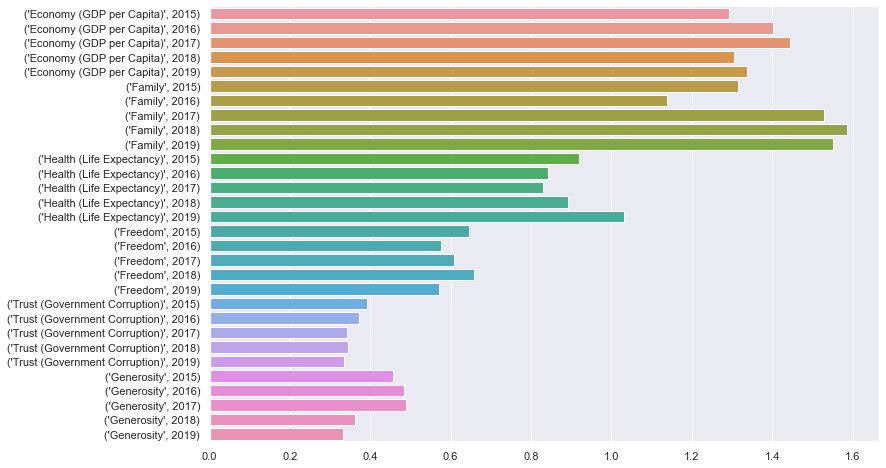

In [117]:
df_two_regions = pd.pivot_table(df_combined.loc[:, ], index= 'Region', columns='Year', values=columns)
# pd.pivot_table(dataf.loc[:, ], index= 'Country', columns='Year', values="Happiness Score").head(30)#null values? Where do they come from?
plt.figure(figsize=(12,8))
sns.set()
sns.barplot(data=pd.pivot_table(df_combined.loc[0:9, ], 
                                index= 'Region', columns='Year', 
                                values=columns)[columns], orient = 'h')

As seen in the graph above, in Sub-Saharan African, the lowest ranking feature is "Trust (Government Corruption)"

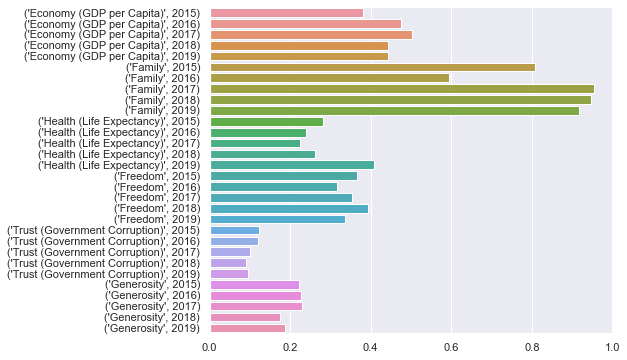

In [119]:
plt.figure(figsize=(7.23,6))
sns.barplot(data=pd.pivot_table(df_combined.loc[10:, ], 
                                index= 'Region', columns='Year', values=columns)[columns], orient = 'h')


Text(0, 0.5, 'Happiness Rank')

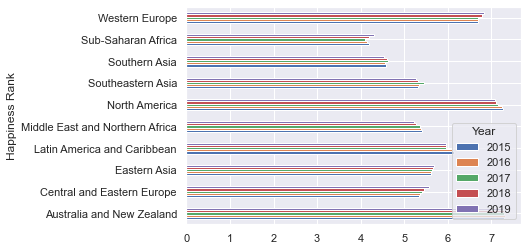

In [125]:
#original data for these two regions
# pd.pivot_table(datax, index='Year', values="Happiness Score")
# pd.pivot_table(datax, index='Region', values="Happiness Score")
columns = ["Economy (GDP per Capita)","Family","Health (Life Expectancy)","Freedom","Trust (Government Corruption)","Generosity"]
pd.pivot_table(datax, index = ['Region', 'Year'], values=columns)
pd.pivot_table(datax, index = ['Region','Country','Happiness Rank', 'Year'], values=columns)
# table
pd.pivot_table(datax, index = ['Region', 'Year'], values="Happiness Score")
pd.pivot_table(datax, index= 'Region', columns='Year', values="Happiness Score")

pd.pivot_table(datax, index= 'Region', columns= 'Year', values= "Happiness Score").plot(kind= 'barh')
plt.ylabel("Happiness Rank")

In [123]:
pivoted = pd.pivot_table(datax, index = ['Region', 'Year'],values=columns)
# pivoted

In [126]:
df_final = pivoted.loc[['Australia and New Zealand','Sub-Saharan Africa']]

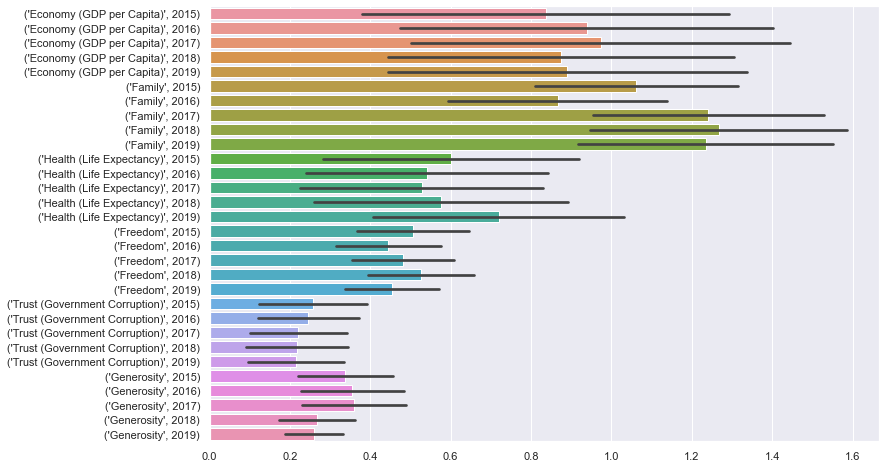

In [127]:
plt.figure(figsize=(12,8))
sns.barplot(data=pd.pivot_table(df_combined, index= 'Region', columns='Year', values=columns)[columns], orient = 'h')

The top 3 features that affect the happiness of these two regions are Economy (GDP per Capita), Family, and Health (Life Expectancy).

## Conclusion

In this analysis, we merged several datasets, explored them, and answered a couple of questions. This sections sums up the results. 

1. How are the variables associated? Does the association vary across years?


Overall, the happiness score is highly associated with GDP, family, and life expectancy, and less associated with generosity.
Associations vary over time, suggesting that as time passes, happiness is less associated with generosity and more associated with GDP.

2. What are the happiest and least happy regions in the world? What is the region with the biggest difference between minimum and maximum happiness score?

We found out that *Australia and New Zealand* is the happiest region in the world, and *Sothern Asia* - the least happy region. The region *Middle East and Northern Africa* has the biggest difference in the Happiness Score. It is due to Yemen and Syria, which have the lowest happiness scores among other countries in the region. The indices explained very little of the Happiness Score, so an assumption is that something else played a role in low Happiness Scores (perhaps civil wars? It is a very speculative statment).

3. Do happier countries also have higher GDP per capita?

Yes, Happiness Score and GDP per capita have positive relationships, meaning that the higher is GDP per capita, the higher is Happiness Score and vice versa. 

4.  Which countries have more variation in happiness score between 2015 and 2019?

Venezuela, Benin, Ivory Coast, Togo, and Algeria have more variation in happiness scores.

5. How Germany's and Brazil's results developed through years?

While Germany had Happiness Score increased between 2015 and 2016, and later maintaining steady high numbers in 2016-2019, Brazil's Happiness Score was decreasing in the same period.

6. Which features make such a big difference between Austrialia and New Zealand and Sub-Saharan African?

The top 3 features affect the happiness of these two regions are Economy (GDP per Capita), Family, and Health (Life Expectancy).